# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

In [1]:
import tensorflow as tf
print(tf.__version__)
# Check GPU available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2.2.0


***
## Load the data

In [2]:
from tensorflow.keras.preprocessing import image

# Load the Fashion-MNIST data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

# Print the shape of the training data
print("Train data shape: {}".format(train_images.shape))

# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train label at 0:", train_labels[0])

Train data shape: (60000, 28, 28)
Train label at 0: 9


In [3]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

label: Coat


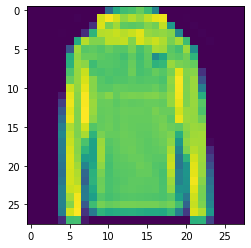

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display one of the images
i = 24
img = train_images[i,:,:]
print(f"label: {labels[train_labels[i]]}")
plt.imshow(img)
plt.show()

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

#### Build a feedforward neural network model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 6.56010956e-03,  1.97050869e-02,  6.16535544e-05, ...,
          2.84154266e-02, -3.02271135e-02, -2.08251998e-02],
        [ 6.00523800e-02, -4.22012024e-02,  2.61028260e-02, ...,
          5.55219948e-02, -5.04186824e-02, -5.26959114e-02],
        [ 1.31844804e-02,  6.91634715e-02, -7.54638761e-03, ...,
         -1.74939707e-02,  3.18592042e-02, -6.26391619e-02],
        ...,
        [ 9.54912603e-03, -3.68044451e-02, -2.56964602e-02, ...,
          2.32030675e-02, -1.95161626e-02,  5.95196337e-02],
        [ 7.77827948e-02,  7.11623430e-02, -1.06154755e-02, ...,
         -8.20396543e-02, -1.02237687e-02,  3.15778852e-02],
        [-8.24317336e-02,  5.65167516e-03,  1.19200572e-02, ...,
         -5.22849597e-02, -8.18238482e-02,  7.17021525e-02]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [34]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy'])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [10]:
import numpy as np 

# Fit the model
history = model.fit(train_images, train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 3s - loss: 1.7906 - accuracy: 0.4578 - top_k_categorical_accuracy: 0.3257
Epoch 2/8
1875/1875 - 3s - loss: 1.0897 - accuracy: 0.6527 - top_k_categorical_accuracy: 0.3909
Epoch 3/8
1875/1875 - 3s - loss: 0.8673 - accuracy: 0.7102 - top_k_categorical_accuracy: 0.4145
Epoch 4/8
1875/1875 - 3s - loss: 0.7453 - accuracy: 0.7603 - top_k_categorical_accuracy: 0.4666
Epoch 5/8
1875/1875 - 4s - loss: 0.6626 - accuracy: 0.7887 - top_k_categorical_accuracy: 0.4609
Epoch 6/8
1875/1875 - 4s - loss: 0.6082 - accuracy: 0.8024 - top_k_categorical_accuracy: 0.4464
Epoch 7/8
1875/1875 - 4s - loss: 0.5713 - accuracy: 0.8108 - top_k_categorical_accuracy: 0.4510
Epoch 8/8
1875/1875 - 4s - loss: 0.5449 - accuracy: 0.8171 - top_k_categorical_accuracy: 0.4433


       loss  accuracy  top_k_categorical_accuracy
0  1.790555  0.457767                    0.325717
1  1.089701  0.652733                    0.390883
2  0.867283  0.710217                    0.414483
3  0.745331  0.760283                    0.466583
4  0.662642  0.788700                    0.460900


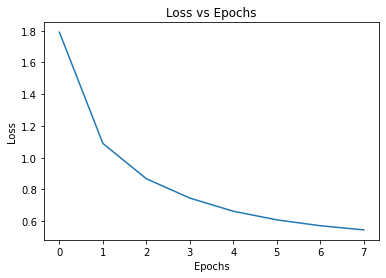

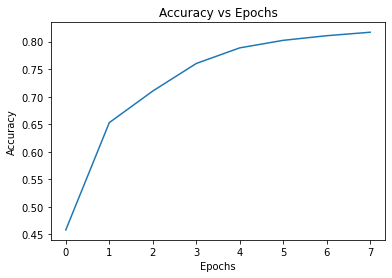

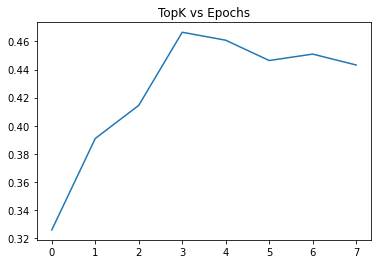

In [12]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [13]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images, 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.5624 - accuracy: 0.8063 - top_k_categorical_accuracy: 0.4523


#### Make predictions from the model

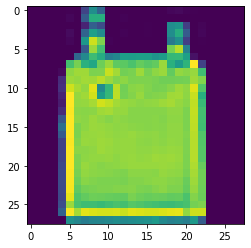

Label: Bag
Model predictions: T-shirt/top


In [25]:
# Choose a random test image

random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...])
print(f"Model predictions: {labels[np.argmax(pred)]}")

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers
#### Build a convolutional neural network model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3, padding='SAME', strides=2, 
        activation='relu', input_shape=(28,28,1), 
        data_format='channels_last'),
    MaxPooling2D(pool_size=3, data_format='channels_last'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [28]:
# Define the model optimizer, loss function and metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, \
    SparseTopKCategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy(),
        SparseTopKCategoricalAccuracy()])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [29]:
import numpy as np 

# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 5s - loss: 0.5078 - sparse_categorical_accuracy: 0.8142 - sparse_top_k_categorical_accuracy: 0.9945
Epoch 2/8
1875/1875 - 4s - loss: 0.3828 - sparse_categorical_accuracy: 0.8563 - sparse_top_k_categorical_accuracy: 0.9976
Epoch 3/8
1875/1875 - 4s - loss: 0.3487 - sparse_categorical_accuracy: 0.8680 - sparse_top_k_categorical_accuracy: 0.9982
Epoch 4/8
1875/1875 - 4s - loss: 0.3284 - sparse_categorical_accuracy: 0.8769 - sparse_top_k_categorical_accuracy: 0.9985
Epoch 5/8
1875/1875 - 5s - loss: 0.3173 - sparse_categorical_accuracy: 0.8804 - sparse_top_k_categorical_accuracy: 0.9987
Epoch 6/8
1875/1875 - 5s - loss: 0.3070 - sparse_categorical_accuracy: 0.8856 - sparse_top_k_categorical_accuracy: 0.9988
Epoch 7/8
1875/1875 - 5s - loss: 0.2954 - sparse_categorical_accuracy: 0.8890 - sparse_top_k_categorical_accuracy: 0.9990
Epoch 8/8
1875/1875 - 5s - loss: 0.2878 - sparse_categorical_accuracy: 0.8913 - sparse_top_k_categorical_accuracy: 0.9990


       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.507814                     0.814200                           0.994483
1  0.382807                     0.856317                           0.997617
2  0.348719                     0.867967                           0.998233
3  0.328355                     0.876850                           0.998550
4  0.317323                     0.880383                           0.998733


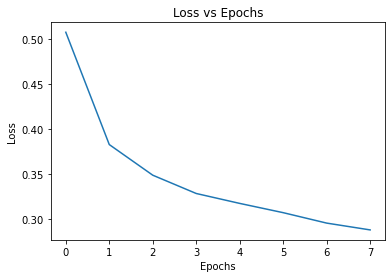

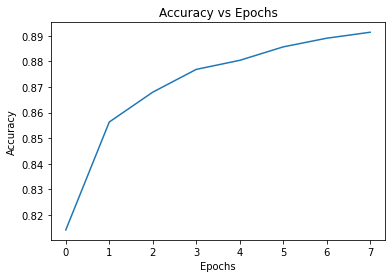

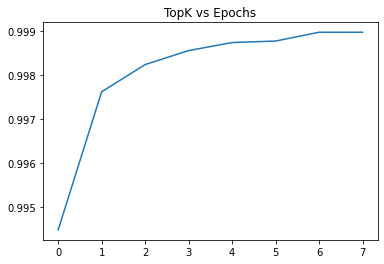

In [30]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [31]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images[...,np.newaxis], 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.3636 - sparse_categorical_accuracy: 0.8702 - sparse_top_k_categorical_accuracy: 0.9981


#### Make predictions from the model

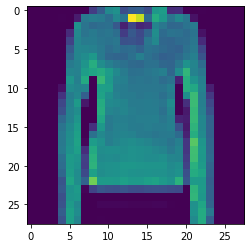

Label: Pullover
Model predictions: Pullover


In [25]:
# Choose a random test image

test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(pred)]}")